In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix

## 1 - Loading dataset

In [2]:
data =pd.read_csv("heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
print( data.info())
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### <b>After that command, we can notice that there are no NaN values in the dataset so we can proceed to data visualization.</b>

## 2 - Data visualization

<AxesSubplot:>

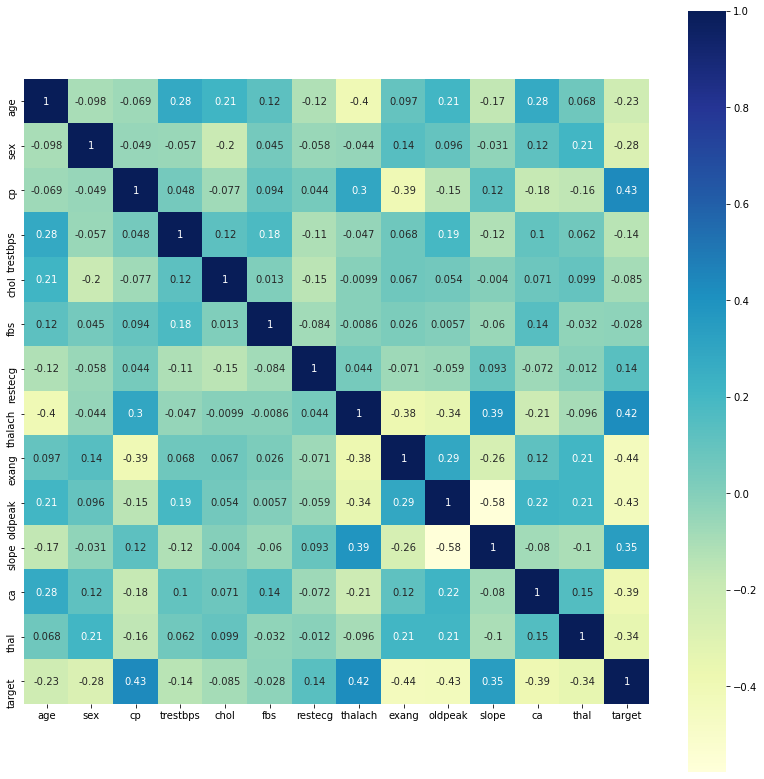

In [4]:
fig, ax = plt.subplots(figsize=(14,14)) 
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu",square=True)

### <b>From the heatmap of the correlation between the features of the dataset, we can notice there are some features that are correlated with our target. So we'll do some visualization on those features.</b>

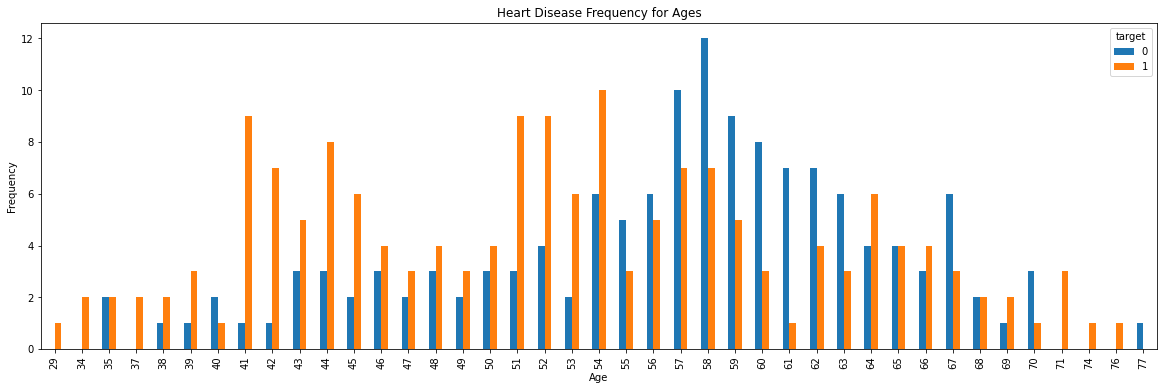

In [5]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

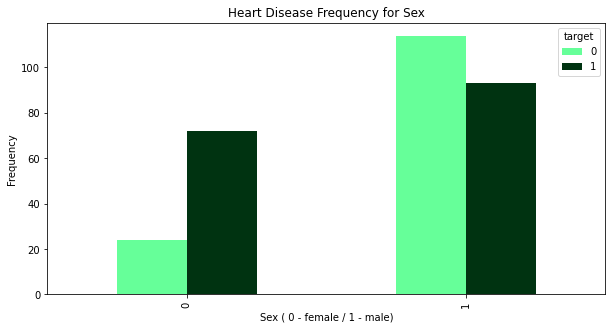

In [6]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(10,5),color=['#66ff99','#003311' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex ( 0 - female / 1 - male)')
plt.ylabel('Frequency')
plt.show()

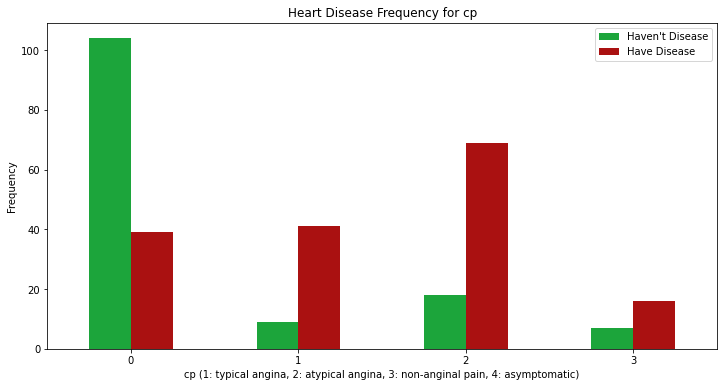

In [7]:
pd.crosstab(data.cp,data.target).plot(kind="bar",figsize=(12,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for cp')
plt.xlabel('cp (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

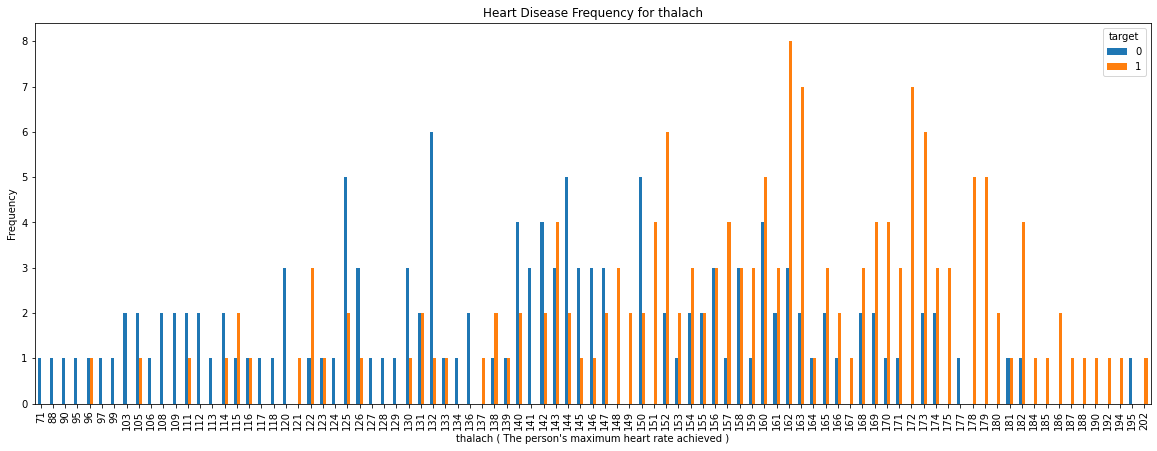

In [8]:
pd.crosstab(data.thalach,data.target).plot(kind="bar",figsize=(20,7))
plt.title('Heart Disease Frequency for thalach')
plt.xlabel("thalach ( The person's maximum heart rate achieved )")
plt.ylabel('Frequency')
plt.show()

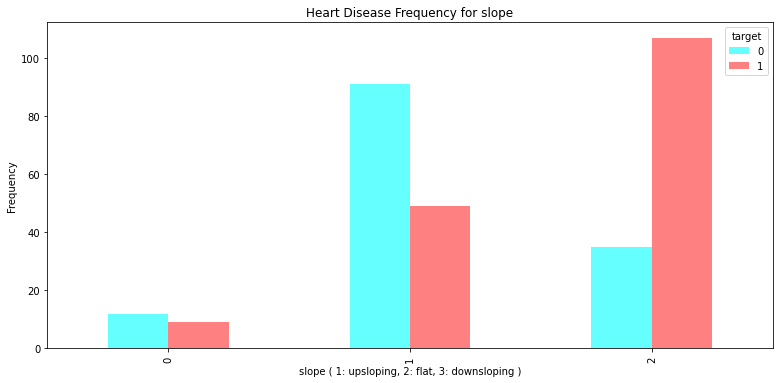

In [9]:
pd.crosstab(data.slope,data.target).plot(kind="bar",figsize=(13,6),color=['#66ffff','#ff8080'])
plt.title('Heart Disease Frequency for slope')
plt.xlabel('slope ( 1: upsloping, 2: flat, 3: downsloping )')
plt.ylabel('Frequency')
plt.show()

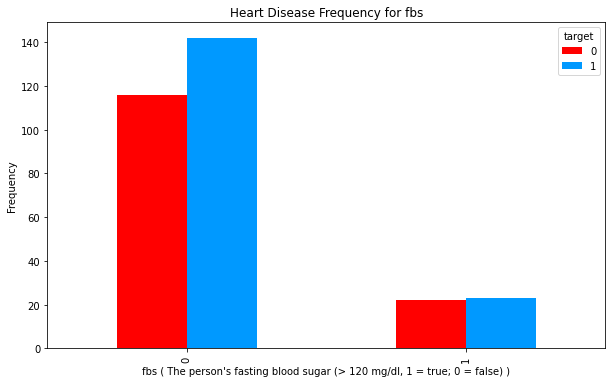

In [10]:
pd.crosstab(data.fbs,data.target).plot(kind="bar",figsize=(10,6),color=['#ff0000','#0099ff'])
plt.title('Heart Disease Frequency for fbs')
plt.xlabel("fbs ( The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false) )")
plt.ylabel('Frequency')
plt.show()

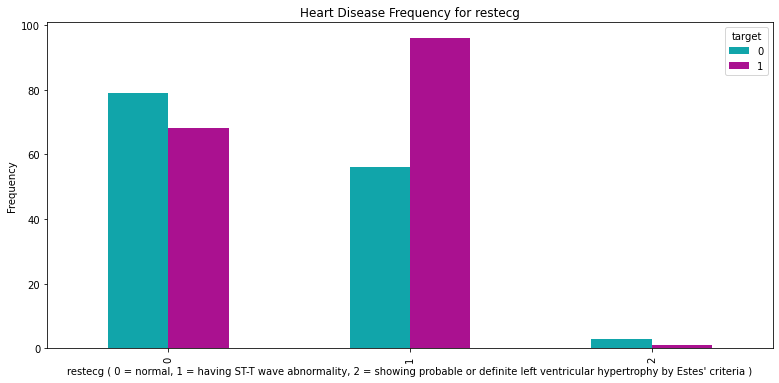

In [11]:
pd.crosstab(data.restecg,data.target).plot(kind="bar",figsize=(13,6),color=['#11A5AA','#AA1190'])
plt.title('Heart Disease Frequency for restecg')
plt.xlabel("restecg ( 0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria )")
plt.ylabel('Frequency')
plt.show()

## 3 - Data preprocessing

### Some features can be turned into dummies so that we can get a better result while training the models.

In [12]:
a = pd.get_dummies(data['sex'], prefix = "sex")
b = pd.get_dummies(data['cp'], prefix = "cp")
c = pd.get_dummies(data['fbs'], prefix = "fbs")
d = pd.get_dummies(data['restecg'], prefix = "restecg")
e = pd.get_dummies(data['exang'], prefix = "exang")
f = pd.get_dummies(data['slope'], prefix = "slope")
g = pd.get_dummies(data['ca'], prefix = "ca")
h = pd.get_dummies(data['thal'], prefix = "thal")

In [13]:
frames = [data, a, b, c, d, e, f, g, h]
data = pd.concat(frames, axis = 1)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,1,3,145,233,1,0,150,0,2.3,...,0,1,0,0,0,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,0,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,1,0,0,0,0,0,0,1,0
3,56,1,1,120,236,0,1,178,0,0.8,...,1,1,0,0,0,0,0,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,...,1,1,0,0,0,0,0,0,1,0


In [14]:
data = data.drop(columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'ca', 'thal', 'slope'])
data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


### we resize and normalize our inputs so that our features are on the same scale and we'll avoid the models to overfit some features.

In [15]:
x_data = data.drop(['target'], axis = 1)

scaler=StandardScaler()
x=scaler.fit_transform(x_data)
x=normalize(x)
x=pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.117262,0.094081,-0.031567,0.001902,0.133905,-0.083865,0.083865,-0.116423,-0.054746,-0.078156,...,-0.115655,0.105322,-0.064358,-0.046634,-0.032738,-0.015952,-0.010038,0.490024,-0.135558,-0.097672
1,-0.316431,-0.015321,0.011928,0.269868,0.350673,-0.112510,0.112510,-0.156188,-0.073445,0.260319,...,-0.155157,0.141295,-0.086339,-0.062562,-0.043920,-0.021400,-0.013467,-0.041520,0.150088,-0.131032
2,-0.308191,-0.019388,-0.170757,0.204361,0.065000,0.306991,-0.306991,-0.197644,0.470274,-0.132681,...,0.222610,0.178798,-0.109256,-0.079167,-0.055577,-0.027080,-0.017042,-0.052540,0.189925,-0.165811
3,0.043004,-0.158450,-0.047343,0.295936,-0.049336,-0.162541,0.162541,-0.225642,0.536892,-0.151476,...,0.254144,0.204126,-0.124733,-0.090382,-0.063450,-0.030916,-0.019456,-0.059983,0.216829,-0.189299
4,0.060959,-0.139323,0.436952,0.122549,-0.079591,0.308172,-0.308172,0.221991,-0.093297,-0.133191,...,0.223466,0.179485,-0.109676,-0.079472,-0.055791,-0.027184,-0.017107,-0.052742,0.190655,-0.166448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.063435,0.104477,-0.022217,-0.254488,-0.158186,0.320691,-0.320691,0.231009,-0.097087,-0.138602,...,-0.205101,0.186777,-0.114131,-0.082700,-0.058058,-0.028289,-0.017802,-0.054885,-0.240398,0.275360
299,-0.197288,-0.235865,0.065461,-0.147384,0.026427,-0.130061,0.130061,-0.180554,-0.084903,-0.121208,...,-0.179362,0.163337,-0.099808,-0.072321,-0.050772,-0.024739,-0.015568,-0.047997,-0.210229,0.240803
300,0.241028,0.113304,-0.165001,-0.060613,0.326411,-0.109162,0.109162,0.169557,-0.071260,-0.101731,...,-0.150541,-0.187429,-0.083770,0.423305,-0.042613,-0.020763,-0.013066,-0.040284,-0.176448,0.202109
301,0.056140,-0.017924,-0.430532,-0.292840,0.026744,-0.131623,0.131623,0.204444,-0.085922,-0.122663,...,-0.181515,-0.225993,0.369840,-0.073190,-0.051381,-0.025036,-0.015755,-0.048573,-0.212753,0.243694


In [16]:
y = data.target.values

## 4 - Multi algorithme model testing

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.33,random_state=30)
accuracies = {}

### 4.1 - Logistic Regression

In [18]:
lr=LogisticRegression()
lr.fit(x_train, y_train)

lr_prediction= lr.predict(x_test)

acc_lr=lr.score(x_test,y_test)*100
accuracies["logistic_regression"] = acc_lr
print("Logistic Regression accuracy : ",round(acc_lr),"%")

Logistic Regression accuracy :  88 %


### 4.2 - Random Forest

In [19]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train, y_train)

rf_prediction = rf.predict(x_test)

acc_rf = rf.score(x_test,y_test)*100
accuracies["random_forest"] = acc_rf
print("Random Forest Accuracy Score : {:.2f}%".format(acc_rf))

Random Forest Accuracy Score : 80.00%


### 4.3 - KNN

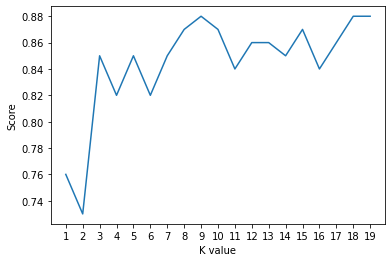

Maximum KNN Score is 88.00% for k = 9


In [20]:
scoreList = {}
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(x_train, y_train)
    scoreList[i] = knn2.score(x_test, y_test)
    
    
plt.plot(range(1,20), scoreList.values())
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc_knn2 = max(scoreList.values())
print("Maximum KNN Score is {:.2f}% for k = {}".format(acc_knn2*100, max(scoreList, key=scoreList.get)))

In [21]:
knn = KNeighborsClassifier(n_neighbors = max(scoreList, key=scoreList.get))
knn.fit(x_train, y_train)

knn_prediction = knn.predict(x_test)

acc_knn = knn.score(x_test, y_test)*100
accuracies["knn"] = acc_knn
print("{} NN Score: {:.2f}%".format(max(scoreList, key=scoreList.get), acc_knn))

9 NN Score: 88.00%


## 5 - Roc curve, Confusion Matrix for each algorithms

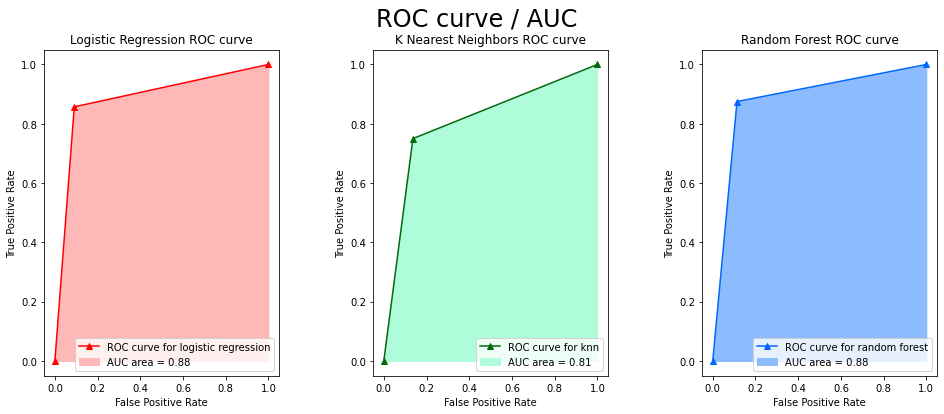

In [22]:
fpr1,tpr1,thresholds1=roc_curve(y_test,lr_prediction)
auc_logs1=auc(fpr1,tpr1)

fpr2,tpr2,thresholds2=roc_curve(y_test,rf_prediction)
auc_logs2=auc(fpr2,tpr2)

fpr3,tpr3,thresholds3=roc_curve(y_test,knn_prediction)
auc_logs3=auc(fpr3,tpr3)

plt.figure(figsize=(16,6))

plt.suptitle("ROC curve / AUC",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(1,3,1)
plt.title("Logistic Regression ROC curve")
plt.plot(fpr1,tpr1,color='#FF0000',marker="^", label="ROC curve for logistic regression")
plt.fill_between(fpr1,tpr1,color="#FFB8B8",label="AUC area = %0.2f" % auc_logs1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")

plt.subplot(1,3,2)
plt.title("K Nearest Neighbors ROC curve")
plt.plot(fpr2,tpr2,color='#026809',marker="^", label="ROC curve for knn")
plt.fill_between(fpr2,tpr2,color="#AFFCDA",label="AUC area = %0.2f" % auc_logs2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")

plt.subplot(1,3,3)
plt.title("Random Forest ROC curve")
plt.plot(fpr3,tpr3,color='#0068FF',marker="^", label="ROC curve for random forest")
plt.fill_between(fpr3,tpr3,color="#8CBBFE",label="AUC area = %0.2f" % auc_logs3)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")

plt.show()

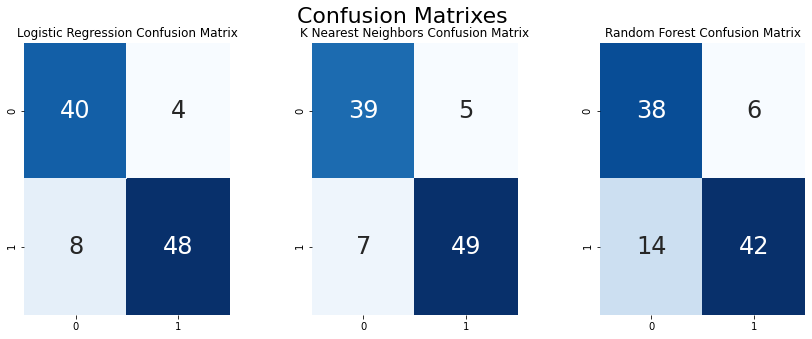

In [23]:
cm_lr = confusion_matrix(y_test,lr_prediction)
cm_knn = confusion_matrix(y_test,knn_prediction)
cm_rf = confusion_matrix(y_test,rf_prediction)

plt.figure(figsize=(14,5))

plt.suptitle("Confusion Matrixes",fontsize=22)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(1,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(1,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(1,3,3)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

## 6 - comparaison

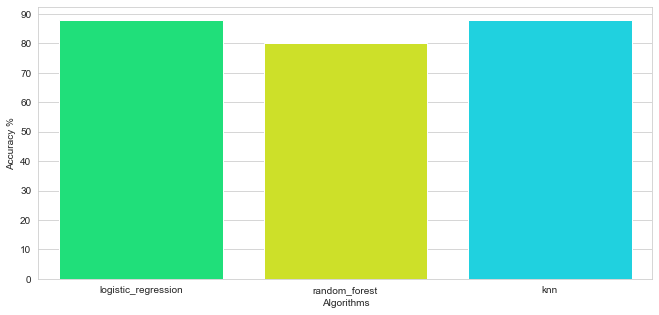

In [24]:
colors = ["#00FF78","#E5FF0A","#00ECFF"]

sns.set_style("whitegrid")
plt.figure(figsize=(11,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()